# NMDA homework 2, question 1
Linear Regression
王敏行 ID:2018012386 wangmx18@mails.tsinghua.edu.cn
Nov 20, 2021

Following codes are generated by myself, with the help of official documents and books. Codes in the last part refers to the demo from TA.

## Part 1: my PCA

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from time import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
# my_PCA, referring to the demo code from TA
def my_PCA1(data,num):
    """
    利用特征值分解完成主成分分析，参考助教提供的demo完成
    参数：
    data:输入数据，0维度是样本，1维度是特征
    num:希望降到的维度
    返回：
    new_data:投影后的数据，0维是样本，1维是特征
    eig_values:特征值
    """
    num_samples,num_features=data.shape                 #输入数据形状
    mean=np.mean(data,axis=0)                           #求各特征均值
    data=data-mean[np.newaxis,:]                        #减均值,mean[np.newaxis,:]形状为[1,num_features]
    # data = data-mean可以吗？
    covariance=data.T.dot(data)/(num_samples-1)         #求协方差矩阵
    eig_values,eig_vectors=np.linalg.eig(covariance)    #计算特征值及特征矩阵 
    tmp_index=np.argsort(-eig_values)                   #从大到小的顺序
    eig_values=eig_values[tmp_index]                    #从大到小排序
    eig_vectors=eig_vectors[:,tmp_index]                #从大到小
    proj_matrix=eig_vectors[:,:num]                     #挑选num个向量进行投影
    new_data=data.dot(proj_matrix)                    #将数据投影到新方向上
    return new_data, eig_values

def my_PCA2(data, num):
    """
    利用奇异值分解完成主成分分析，修改自https://blog.csdn.net/SZU_Kwong/article/details/106536266
    参数：
    data:输入数据
    num:希望降到的维度
    返回：
    new_data:投影后的数据
    eig_values:特征值
    """
    num_samples,num_features=data.shape                 #输入数据形状
    mean=np.mean(data,axis=0)                           #求各特征均值
    data=data-mean[np.newaxis,:]
    C = np.dot(data.T, data)
    eig_values,eig_vectors=np.linalg.eig(C)
    eigV = abs(np.array(eig_values)).reshape(1,-1)
    sinV = np.sqrt(eigV)
    tmp = np.zeros([np.size(sinV,1),np.size(sinV,1)])
    for i in range(0,np.size(sinV,1)):
        tmp[i,i]=sinV[0,i]
    sinV1 =tmp
      
    V = eig_vectors/np.linalg.norm(eig_vectors, axis=0)
    U = np.dot(data, np.linalg.inv(np.dot(sinV1, V.T)))
    U=U.T

    tmp_index = np.argsort(-eigV)
    eigV.tolist()[0].reverse
    tmp = U.copy()
    for i in range(0, np.size(U, 0)):
      U[i,:]=tmp[tmp_index[0][i],:]
      
    transMat = U[0:num,:].T
    return np.real(transMat),sinV.reshape(-1,)

def my_PCA3(data, num):
    """
    参数：
    data:输入数据
    num:希望降到的维度
    返回：
    new_data:投影后的数据
    eig_values:特征值
    """
    num_samples,num_features=data.shape                 #输入数据形状
    mean=np.mean(data,axis=0)                           #求各特征均值
    data=data-mean[np.newaxis,:]
    mean = np.mean(data,axis=0)                     
    data = data-mean[np.newaxis,:] 
    U, Sigma, VT = np.linalg.svd(data)
    new_data = U[:,:num]
    return new_data, Sigma



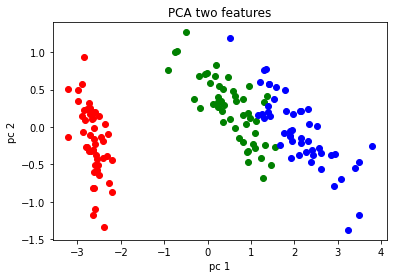

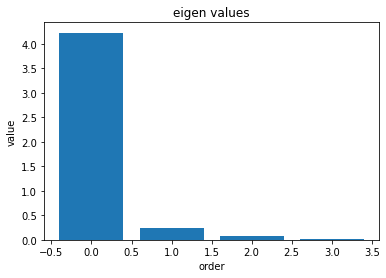

In [4]:
iris=load_iris()
iris_data = iris.data
new_data, eig_values=my_PCA1(iris_data,2)
plt.scatter(new_data[:50,0],new_data[:50,1],c='r')
plt.scatter(new_data[50:100,0],new_data[50:100,1],c='g')
plt.scatter(new_data[100:150,0],new_data[100:150,1],c='b')
plt.title('PCA two features')
plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.show()
plt.bar(range(len(eig_values)),eig_values)
plt.title('eigen values')
plt.xlabel('order')
plt.ylabel('value')
plt.show()

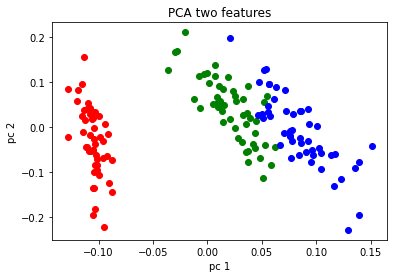

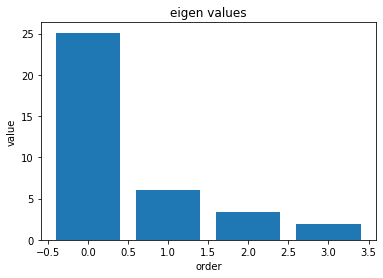

In [5]:
new_data, eig_values=my_PCA2(iris_data,2)
plt.scatter(new_data[:50,0],new_data[:50,1],c='r')
plt.scatter(new_data[50:100,0],new_data[50:100,1],c='g')
plt.scatter(new_data[100:150,0],new_data[100:150,1],c='b')
plt.title('PCA two features')
plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.show()
plt.bar(range(len(eig_values)),eig_values)
plt.title('eigen values')
plt.xlabel('order')
plt.ylabel('value')
plt.show()

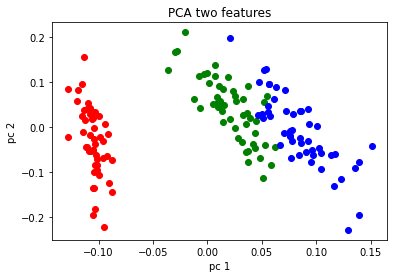

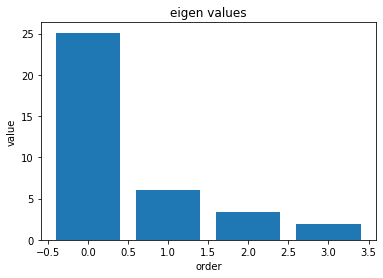

In [6]:
new_data, eig_values=my_PCA3(iris_data,2)
plt.scatter(new_data[:50,0],new_data[:50,1],c='r')
plt.scatter(new_data[50:100,0],new_data[50:100,1],c='g')
plt.scatter(new_data[100:150,0],new_data[100:150,1],c='b')
plt.title('PCA two features')
plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.show()
plt.bar(range(len(eig_values)),eig_values)
plt.title('eigen values')
plt.xlabel('order')
plt.ylabel('value')
plt.show()

In [7]:
x = np.load('NMDA2021_HW2/ex1.npz')
X = x['X']
y = x['y']
print(X.shape)
print(y.shape,y[0:10])

(966, 11750)
(966,) [4 1 3 3 6 3 6 2 5 5]


In [11]:
XX = X[0:10,:]
# 考虑到966张脸的数据太多了，电脑性能不够。因此选取前10张脸进行性能测试。
t0 = time()
new_X = my_PCA1(XX,2)
t1 = time()
print('eigen value decomposition based PCA spend {t} seconds.'.format(t = t1-t0))


In [19]:
XX = X[0:10,:]
t0 = time()
new_X = my_PCA2(XX,2)
t1 = time()
print('SVD-based PCA spend {t} seconds.'.format(t = t1-t0))

In [8]:
XX = X[0:10,:]
t0 = time()
new_X = my_PCA3(X,2)
t1 = time()
print('SVD-based PCA spend {t} seconds.'.format(t = t1-t0))

SVD-based PCA spend 25.332208395004272 seconds.


In [9]:
t0 = time()
cls = PCA(n_components=2)
new_X = cls.fit(X)
t1 = time() 
print('official PCA spend {t} seconds.'.format(t = t1-t0))

official PCA spend 0.19037747383117676 seconds.


`my_PCA1`：采用EVD。

`my_PCA2`：采用我自己写的SVD。

`my_PCA3`：采用`numpy.linalg.svd`。

由于计算机的性能原因，即使减少了脸的数量，也没EVD能完成在人脸数据集上的计算。
可见SVD的计算效率要比SVD高许多。且我写的SVD效率没有`linalg.SVD`的效率高。这也许是`numpy`本身经过矩阵计算方面优化的原因。
但是在`iris`数据集上的结果表明，我写的`my_PCA1`和`my_PCA2`都是可以正常工作的。说明这两个函数相比较于`sklearn.decomposition.PCA`还存在很大的优化空间。有机会的话，希望能用更强的算力试试这两个函数的性能。

## Part 2:face classification

In [41]:
x = np.load('NMDA2021_HW2/ex1.npz')
X = x['X']
y = x['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

n_components = 100
h=125
w=94
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

asd=pca.components_
eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

done in 0.412s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.033s


In [42]:
from sklearn.model_selection import GridSearchCV
t0 = time()
param_grid = {
    "C": [1e3, 5e3, 1e4, 5e4, 1e5],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}

clf = GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid)
clf = clf.fit(X_train_pca, y_train)
test_score = clf.score(X_test_pca, y_test)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print('accuracy on train set is', clf.best_score_,'.\naccuracy on test set is', test_score,'.')

done in 7.442s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)
accuracy on train set is 0.814821952241307 .
accuracy on test set is 0.8402061855670103 .


**工作流程**：
1. 将`ex1.npz`的数据按照4:1分为训练集`X_train`和测试集`X_train_pca``X_test`；
2. 在训练集上进行PCA，主成分分析的结果`pca`对训练集和测试集进行降维（降到**num**维），分别得到`X_train_pca`和`X_test_pca`；
3. 用SVM对降维后的训练集进行分类，SVM的参数通过`GridSearch`优化，优化的过程中已经考虑了cross validation，优化结果为`clf`；
4. 在降维后的测试集上分类，并判断准确性；
    > 发现**num**=100是一个不错的选择，维度太少、太多都会造成测试集的分类准确性下降。（这里试了num=10，50，100,150，500）
5. 最后在`test.npz`上，先用同样的降维映射`PCA`降维到**num**维，再用同样的SVM`clf`进行分类。


In [53]:
xv= np.load('NMDA2021_HW2/test.npz')
Xv = xv['X']
#Yv = xv['y']
Xv_pca = pca.transform(Xv)
y_validation = clf.predict(X_test_pca)
np.savetxt('output.txt',y_validation, fmt ='%.0f', delimiter=' ', newline=' ')
print(y_validation)

[1 3 3 3 1 2 2 1 1 3 6 4 3 3 2 2 3 3 3 6 3 1 3 3 3 3 5 2 1 1 0 3 1 1 3 0 1
 0 5 6 6 4 3 3 3 3 3 1 3 1 3 3 1 3 1 3 3 3 6 0 1 3 3 0 3 3 3 4 2 6 5 1 3 4
 3 3 6 6 1 3 4 3 3 5 1 5 1 3 0 3 1 3 3 3 3 4 5 6 3 0 1 5 2 2 1 5 1 1 1 3 3
 2 3 4 1 3 5 6 2 4 1 3 1 3 3 3 1 4 0 3 6 3 4 0 3 6 3 4 3 6 1 3 3 2 3 4 3 3
 4 6 1 4 1 1 3 2 3 3 1 6 1 3 3 3 6 4 6 3 0 0 4 4 3 3 3 0 0 1 3 1 6 3 2 3 3
 3 1 1 3 3 1 1 1 1]
